<a href="https://colab.research.google.com/github/YeonJaeHong/ESAA_homeworks/blob/main/11_17_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#파이썬 머신러닝 ch.6 차원 축소 (377~)

SyntaxError: ignored


01. 차원 축소



*   pca,lda,svd,nmf
*   차원 축소는 매우 많은 피러초 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것


*   차원이 증가할수록 데이터 포인트 간의 거리가 멀어져서 상대적으로 적은 차원에서의 학습된 모델보다 예측 신뢰도가 떨어짐. 또한 피처가 많을수록 개별 피처간에 상관관계가 높을 가능성이 큼
*  차원축소를 할 경우 시각적으로 데이터 표시, 학습에 필요한 처리 능력도 줄일 수 있음


*   차원축소를 통해서 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 것이 목표
*   차원축소 알고리즘은 텍스트 문서의 숨겨진 의미 추출에도 있음









02. PCA 개요


*   여러 변수간 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
*   가장 높은 분산을 가지는 데이터의 축을 찾아 그 축을 기준으로 차원을 축소하고 그 축은 PCA의 주성분이 된다. (분산이 데이터의 특징을 가장 잘 나타낸다고 간주)



*   데이터 변동성을 기반으로 첫번때 벡터 축 생성, 이 벡터축에 직각이 되는 직교벡터를 축으로 함 세번째 축은 다시 두번째 축과 직각이 되는 벡터를 설정
*  원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 설명할 수 있는 분석법


In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터 세트를 판다스 dataframe 으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width']
iris_df= pd.DataFrame(iris.data,columns=columns)
iris_df['target']=iris.target
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


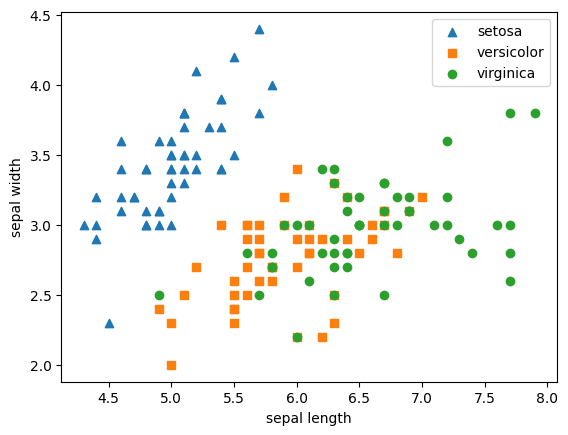

In [10]:
markers = ["^", "s", "o"]
# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

PCA는 여러 피처 값을 연산하기에 스케일에 영향을 받으므로 PCA 적용 전에 피처 스케일링 작업이 필요하다.

여기선 StandardScaler()로 표준 정규 분포로 변환하였다.

In [11]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [13]:
from sklearn.decomposition import PCA

# 변환할 차원 수 입력
pca = PCA(n_components = 2)

# 스케일 데이터 -> PCA 변환 데이터
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

print(f"스케일 데이터 shape: {iris_scaled.shape}")
print(f"PCA 데이터 shape: {iris_pca.shape}")

스케일 데이터 shape: (150, 4)
PCA 데이터 shape: (150, 2)


PCA를 이용해 기존 4차원(4개 피처)에서 2차원으로 변환 하였다.

In [14]:

# PCA 데이터 프레임 생성
pca_columns=['pca_component_1','pca_component_2']

iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target

iris_df_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


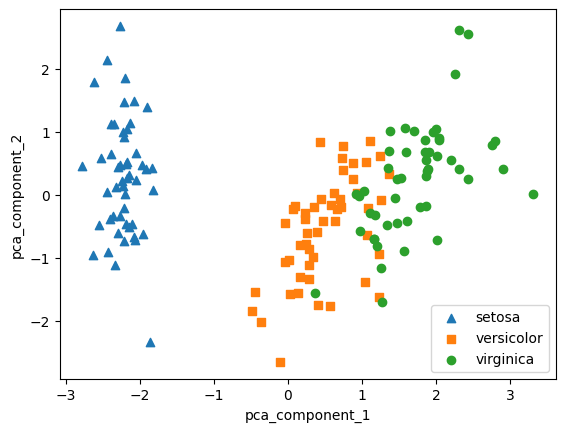

In [15]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

setosa의 경우 pca_component_1 축을 기반으로 명확하게 구분된다.

versicolor, virginica는 pca_component_1 축을 기반으로 일부 겹치긴 하지만 비교적 잘 구분되었다.

이는 pca_component_1이 원본 데이터의 변동성을 잘 반영하였기 때문이다.
그 다음 pca 객체의 explained_variance_ratio_ 속성을 통해서 전체 변동성에서 개별 pca 컴포넌트별로 차지하는 변동성 비율을 확인하겠다

In [16]:
# Component 변동성 반영 비율
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


여기선 pca_component_1이 전체 변동성의 약 72.9%, pca_component_2가 약 22.8%를 차지한다.

즉, PCA를 2개 요소로만 변환해도 원본 데이터 변동성의 약 95%를 설명할 수 있다.

원본과 pca로 변환된 데이터 세트에 각각 분류를 적용해보기 (랜덤포레스트), cross_val_score로 3개의 교차검증세트로 정확도 비교

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(random_state=1017)

# 교차 검증
scores = cross_val_score(rcf, iris_df.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.98 0.94 0.92]
원본 데이터 평균 정확도: 0.9467


In [18]:
#pca 변환 세트에 랜덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(random_state=1017)

# 교차 검증
pca_scores = cross_val_score(rcf, iris_df_pca.iloc[:,:-1], iris_df_pca.target, scoring = "accuracy", cv = 3)

print(f"PCA 데이터 fold별 정확도: {pca_scores}")
print(f"PCA 데이터 평균 정확도: {np.mean(pca_scores):.4f}")

PCA 데이터 fold별 정확도: [0.88 0.88 0.88]
PCA 데이터 평균 정확도: 0.8800


PCA 변환 후에는 원본에 비해 속성(피처)이 줄어들기에 예측 성능은 감소될 수 밖에 없다.

정확도가 대략 6%가량 하락하여 비교적 큰 수치로 감소하였다.

하지만 속성(피처)이 4개에서 2개로 50% 감소한 것을 고려하면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

신용카드 고객 데이터 세트

In [22]:
import pandas as pd
#header로 의미없는 첫줄 제거, iloc로 기존 id 제거
df = pd.read_excel("/content/default of credit card clients.xls", header=1, sheet_name="Data").iloc[0:,1:]

print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


target은 default payment next month으로 다음달 연체 여부를 의미하며 0은 정상납부, 1은 연체를 의미한다.

PAY_0 다음에 PAY_2가 나와 있어 PAY_0를 PAY_1으로 변경하고 target의 컬럼명도 너무 길기에 default로 변경한다

In [23]:
# 컬럼명 변경
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

X_features = df.drop('default', axis=1)
y_target = df['default']

<Axes: >

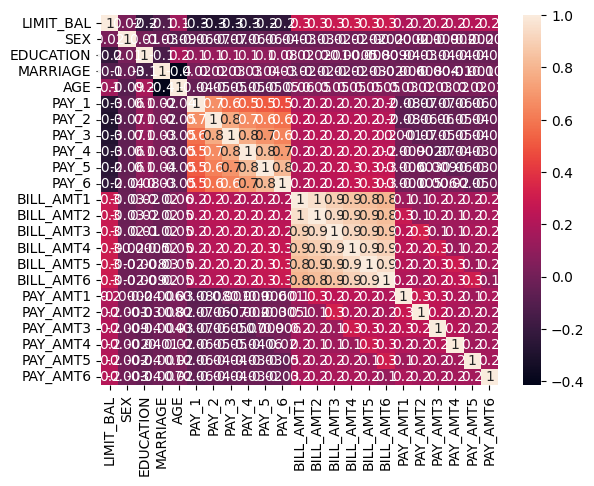

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 피처 상관관계
corr = X_features.corr()

sns.heatmap(corr, annot=True, fmt='.1g')


피처 간 상관관계를 확인하였을 때 BILL_AMT1 ~ BILL_AMT6 간의 상관계수가 0.8 ~ 1.0으로 매우 높다.

In [26]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# PCA: n = 2
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차 검증
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print("cv=3인 경우 개별 fold별 정확도:" scores)
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

SyntaxError: ignored

In [28]:
#6개의 컴포넌트를 pca로 변환한 데이터 세트에 대해서 동일하게 분류 예측을 진행
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# PCA: n = 6 , 6개의 컴포넌트를 가진 pca 변환을 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차 검증 (6개의 컴포넌트)
pca_scores = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print(f"PCA 데이터 fold별 정확도: {pca_scores}")
print(f"PCA 데이터 평균 정확도: {np.mean(pca_scores):.4f}")

PCA 데이터 fold별 정확도: [0.7927 0.7975 0.8012]
PCA 데이터 평균 정확도: 0.7971


PCA 변환 전 23개의 속성에서 약 25% 수준인 6개의 PCA 컴포넌트로 예측하였음에도 정확도는 약 2%만 감소하였다.

2% 감소가 작은 것은 아니지만 전체 속성의 25%만으로도 이정도 예측 성능을 유지하는 것은 PCA의 압축 능력을 잘 보여준다